In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [4]:
df = pd.read_csv("IMDB_movie_reviews_details.csv")

In [5]:
df.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M


# `Droping the unwanted column`

In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.year.unique()

array(['1994', '1972', '2020', '2008', '1974', '1957', '2003', '1993',
       '2010', '1999', '2001', '1966', '2002', '1990', '1980', '1975',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2018', '2011', '2006', '2000', '1988', '1985',
       '1968', '1960', '1942', '1936', '1931', '2017', '2016', 'I 2017',
       '2012', '2009', '2007', '1984', '1981', '1979', '1963', '1964',
       '1950', '1940', '2013', 'I 2020', '2005', '2004', '1992', '1987',
       '1986', '1983', '1976', '1973', '1971', '1959', '1958', '1952',
       '1948', '1944', '1941', '1927', '1921', '2015', '2021', '1996',
       '1989', '1978', '1965', '1961', '1953', '1925', '1924', 'III 2016',
       'I 2014', 'I 2015', 'I 2013', '1982', '1967', '1955', '1951',
       '1949', '1939', '1937', '1934', '1930', '1928', '1926', '1920',
       'I 2004', '1970', '1969', '1956', '1947', '1945', '1943',
       'II 2016', 'I 2011', 'I 2001', '1938', '1935', '1933', '1932',
       

In [8]:
df.rating.unique()

array([9.3, 9.2, 9.1, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1,
       8. , 7.9, 7.8, 7.7, 7.6])

In [9]:
df.head()

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M


In [10]:
df.shape

(1000, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   year       1000 non-null   object 
 2   runtime    1000 non-null   int64  
 3   genre      1000 non-null   object 
 4   rating     1000 non-null   float64
 5   metascore  841 non-null    float64
 6   timeline   1000 non-null   object 
 7   votes      1000 non-null   object 
 8   gross      829 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [12]:
# There are some unrelevant character in the values of year column like "II 1994 or III 2002".So, trying to remove those characters.

for i in range(0,len(df.year)):
    if('III ' in df.year[i] or 'I' in df.year[i] or 'II' in df.year[i] or 'I ' in df.year[i] or 'II ' in df.year[i]):
        df.year[i] = df.year[i].replace("I","").replace(" ","")

C:\Users\SATISH REDDY KONALA\AppData\Local\Temp\ipykernel_15804\1029794196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year[i] = df.year[i].replace("I","").replace(" ","")


In [13]:
df.year.unique()

array(['1994', '1972', '2020', '2008', '1974', '1957', '2003', '1993',
       '2010', '1999', '2001', '1966', '2002', '1990', '1980', '1975',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2018', '2011', '2006', '2000', '1988', '1985',
       '1968', '1960', '1942', '1936', '1931', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1963', '1964', '1950',
       '1940', '2013', '2005', '2004', '1992', '1987', '1986', '1983',
       '1976', '1973', '1971', '1959', '1958', '1952', '1948', '1944',
       '1941', '1927', '1921', '2015', '2021', '1996', '1989', '1978',
       '1965', '1961', '1953', '1925', '1924', '1982', '1967', '1955',
       '1951', '1949', '1939', '1937', '1934', '1930', '1928', '1926',
       '1920', '1970', '1969', '1956', '1947', '1945', '1943', '1938',
       '1935', '1933', '1932', '1922'], dtype=object)

In [14]:
len(df.year.unique())

100

In [15]:
len(df.name.unique())

997

In [16]:
for i in df.groupby("year")["name"]:
    print(i)

('1920', 331    The Cabinet of Dr. Caligari
Name: name, dtype: object)
('1921', 129    The Kid
Name: name, dtype: object)
('1922', 577    Nosferatu
Name: name, dtype: object)
('1924', 194    Sherlock Jr.
Name: name, dtype: object)
('1925', 193          The Gold Rush
470    Battleship Potemkin
Name: name, dtype: object)
('1926', 330    The General
Name: name, dtype: object)
('1927', 128    Metropolis
329       Sunrise
Name: name, dtype: object)
('1928', 327    The Passion of Joan of Arc
328                    The Circus
Name: name, dtype: object)
('1930', 326    All Quiet on the Western Front
Name: name, dtype: object)
('1931', 53      City Lights
127               M
722    Frankenstein
Name: name, dtype: object)
('1932', 576      Freaks
721    Scarface
Name: name, dtype: object)
('1933', 575            King Kong
720            Duck Soup
886    The Invisible Man
Name: name, dtype: object)
('1934', 325    It Happened One Night
469             The Thin Man
Name: name, dtype: object)
('193

<BarContainer object of 40 artists>

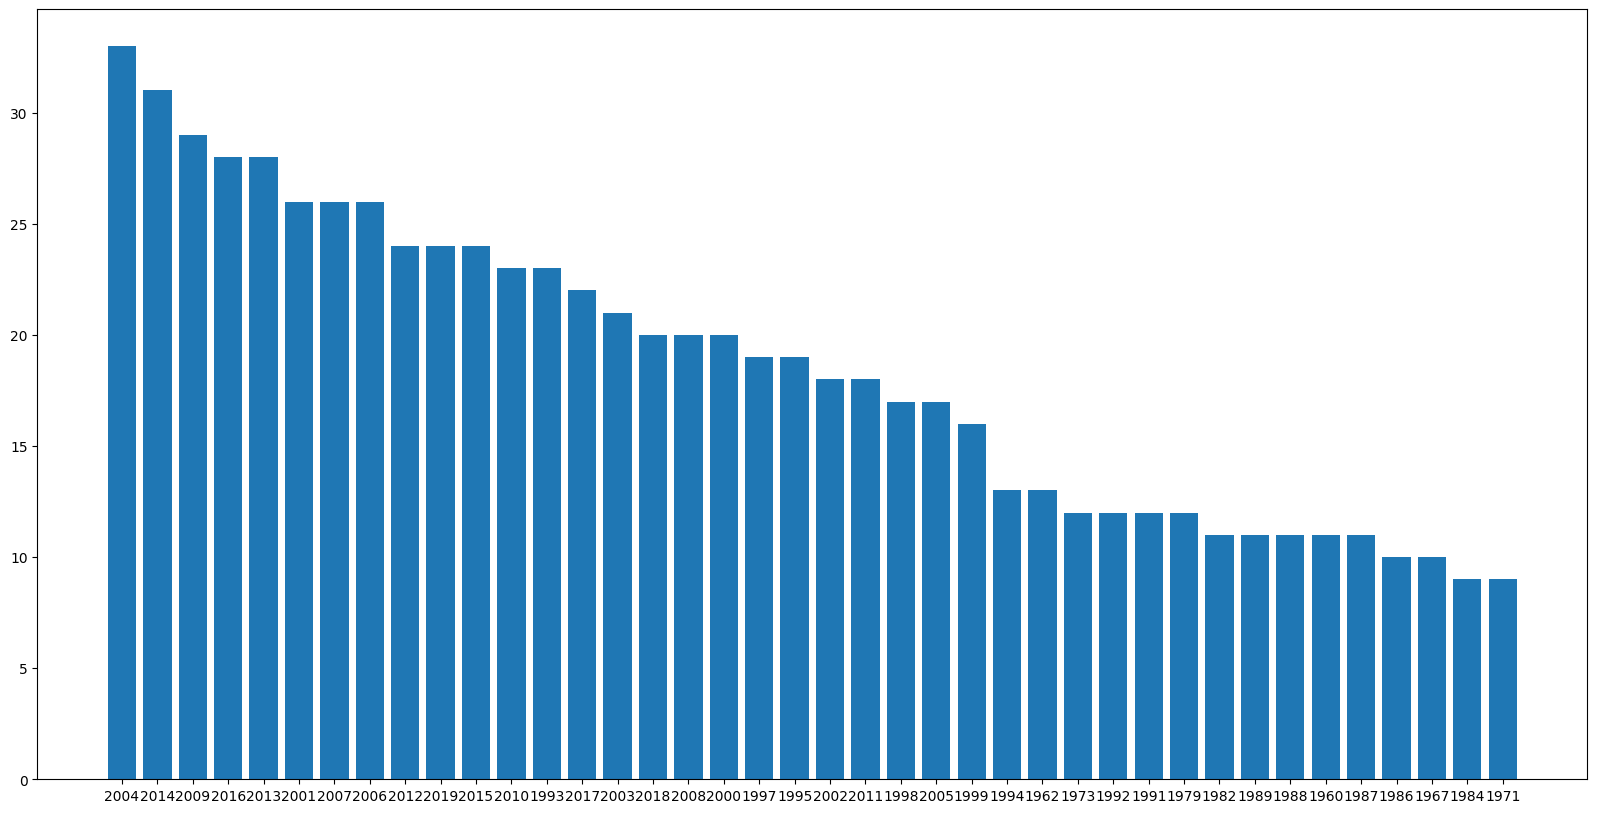

In [17]:
# Creating a Bar graph to show which year have more movie releases.

data = pd.DataFrame(df["year"].value_counts())
data = data.reset_index()
data = data.rename(columns = {"index":"Year","year":"Count"})

plt.figure(figsize=(20,10))
plt.bar(data["Year"][0:40],data["Count"][0:40])

In [18]:
df

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,"A young New York socialite becomes interested in a young man who has moved into her apartment building, but her past threatens to get in the way.","169,575",NaN
996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas cattle rancher and his family and associates.,"34,759",NaN
997,Shane,1953,118,"Drama, Western",7.6,80.0,"A weary gunfighter attempts to settle down with a homestead family, but a smoldering settler/rancher conflict forces him to act.","37,753",$20.00M
998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punished for not boxing on his unit's team, while his captain's wife and second-in-command are falling in love.","44,086",$30.50M


# `Droping the null values in the dataset`

In [19]:
df.dropna()

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M
5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,"706,079",$4.36M
...,...,...,...,...,...,...,...,...,...
991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.6,50.0,A group of U.S. soldiers sneaks across enemy lines to get their hands on a secret stash of Nazi treasure.,"45,985",$1.38M
993,The Jungle Book,1967,78,"Animation, Adventure, Family",7.6,65.0,Bagheera the Panther and Baloo the Bear have a difficult time trying to convince a boy to leave the jungle for human civilization.,"168,985",$141.84M
994,A Hard Day's Night,1964,87,"Comedy, Musical",7.6,96.0,"Over two ""typical"" days in the life of The Beatles, the boys struggle to keep themselves and Sir Paul McCartney's mischievous grandfather in check while preparing for a live television performance.","40,931",$13.78M
997,Shane,1953,118,"Drama, Western",7.6,80.0,"A weary gunfighter attempts to settle down with a homestead family, but a smoldering settler/rancher conflict forces him to act.","37,753",$20.00M


# `Trying to show the films which have more ratings`

In [20]:
Ratings = df[df["rating"]>=8.0]

In [21]:
Ratings.shape

(471, 9)

In [22]:
Ratings.head(10)

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M
5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,"706,079",$4.36M
6,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,"1,672,460",$377.85M
7,Pulp Fiction,1994,154,"Crime, Drama",8.9,94.0,"The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.","1,862,472",$107.93M
8,Schindler's List,1993,195,"Biography, Drama, History",8.9,94.0,"In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.","1,236,213",$96.90M
9,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,"2,113,984",$292.58M


# `Printing the top 10 movies based on ratings`

In [23]:
Top_movies = Ratings.sort_values(by="rating",ascending=False)

In [24]:
Top_movies.head(10)

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M
5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,"706,079",$4.36M
6,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,"1,672,460",$377.85M
7,Pulp Fiction,1994,154,"Crime, Drama",8.9,94.0,"The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.","1,862,472",$107.93M
8,Schindler's List,1993,195,"Biography, Drama, History",8.9,94.0,"In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.","1,236,213",$96.90M
11,The Lord of the Rings: The Fellowship of the Ring,2001,178,"Action, Adventure, Drama",8.8,92.0,A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.,"1,693,187",$315.54M


In [25]:
df[~(df['gross'].isna())]['gross']

0       $28.34M
1      $134.97M
3      $534.86M
4       $57.30M
5        $4.36M
         ...   
991      $1.38M
993    $141.84M
994     $13.78M
997     $20.00M
998     $30.50M
Name: gross, Length: 829, dtype: object

# `Top 5 movies which have the more gross` 

In [26]:
df[["name","gross"]].sort_values(by='gross', ascending=False).head(5)

,name,gross
684,The Color Purple,$98.47M
753,The Social Network,$96.96M
8,Schindler's List,$96.90M
954,The Others,$96.52M
270,Dead Poets Society,$95.86M


In [27]:
# Converting the Data type of votes from object to int

In [28]:
for i in range(0,len(df["votes"])):
    df["votes"][i] = int(str(df["votes"][i]).replace(",",""))

C:\Users\SATISH REDDY KONALA\AppData\Local\Temp\ipykernel_15804\3561621291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["votes"][i] = int(str(df["votes"][i]).replace(",",""))


In [29]:
# Converting the Data type of gross from object to int or float

In [30]:
for i in range(0,len(df["gross"])):
    df["gross"][i] = float(str(df["gross"][i]).replace("$","").replace("M","").replace("B",""))

C:\Users\SATISH REDDY KONALA\AppData\Local\Temp\ipykernel_15804\884671381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gross"][i] = float(str(df["gross"][i]).replace("$","").replace("M","").replace("B",""))


In [31]:
# Filtering the "votes" column based on which movie have more than 5L votes

filtered_movie_ratings = df[df["votes"]>=500000]

In [32]:
filtered_movie_ratings[["name","metascore","rating","runtime","votes"]].sort_values(by="votes",ascending=False).head(10)

,name,metascore,rating,runtime,votes
0,The Shawshank Redemption,80.0,9.3,142,2394059
3,The Dark Knight,84.0,9.0,152,2355907
9,Inception,74.0,8.8,148,2113984
10,Fight Club,66.0,8.8,139,1892181
7,Pulp Fiction,94.0,8.9,154,1862472
12,Forrest Gump,82.0,8.8,142,1851357
15,The Matrix,73.0,8.7,136,1710438
11,The Lord of the Rings: The Fellowship of the Ring,92.0,8.8,178,1693187
6,The Lord of the Rings: The Return of the King,94.0,8.9,201,1672460
1,The Godfather,100.0,9.2,175,1658439


<Figure size 2000x1000 with 0 Axes>

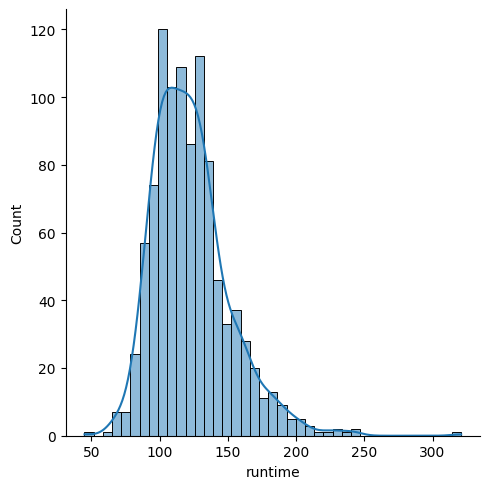

In [33]:
plt.figure(figsize=(20,10))
sns.displot(df["runtime"],kde=True)

In [34]:
Actual_Data = df.drop(["name","year","timeline","genre"],axis=1)
Actual_Data=Actual_Data.dropna()
Actual_Data

,runtime,rating,metascore,votes,gross
0,142,9.3,80.0,2394059,28.34
1,175,9.2,100.0,1658439,134.97
3,152,9.0,84.0,2355907,534.86
4,202,9.0,90.0,1152912,57.3
5,96,9.0,96.0,706079,4.36
...,...,...,...,...,...
991,144,7.6,50.0,45985,1.38
993,78,7.6,65.0,168985,141.84
994,87,7.6,96.0,40931,13.78
997,118,7.6,80.0,37753,20.0


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [3]:
LR = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
X = Actual_Data.drop("gross",axis=1)
y = Actual_Data["gross"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# creating the model using fit() function

LR.fit(X,y)

LinearRegression()

In [ ]:
# predicting for the train data

y_train_pred = LR.predict(X_train)

C:\Users\nanim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross', ylabel='Density'>

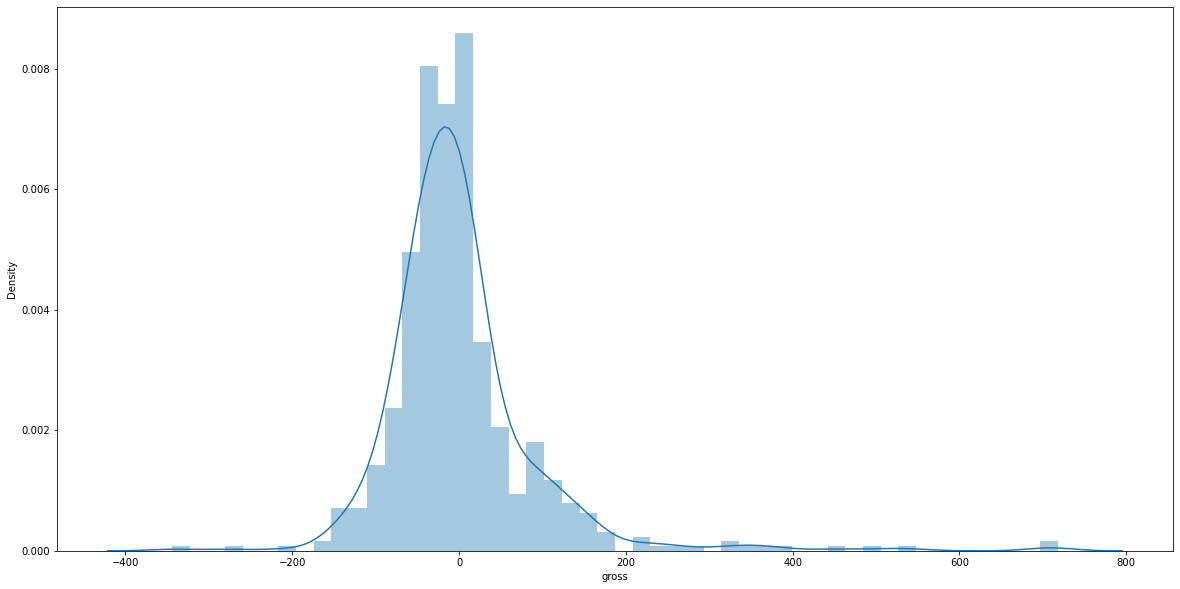

In [ ]:
# By below distplot we can find out that the predicted values are likely to the actual values

plt.figure(figsize=(20,10))
sns.distplot(y_train-y_train_pred)

In [ ]:
y_test_pred = LR.predict(X_test)

C:\Users\nanim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross', ylabel='Density'>

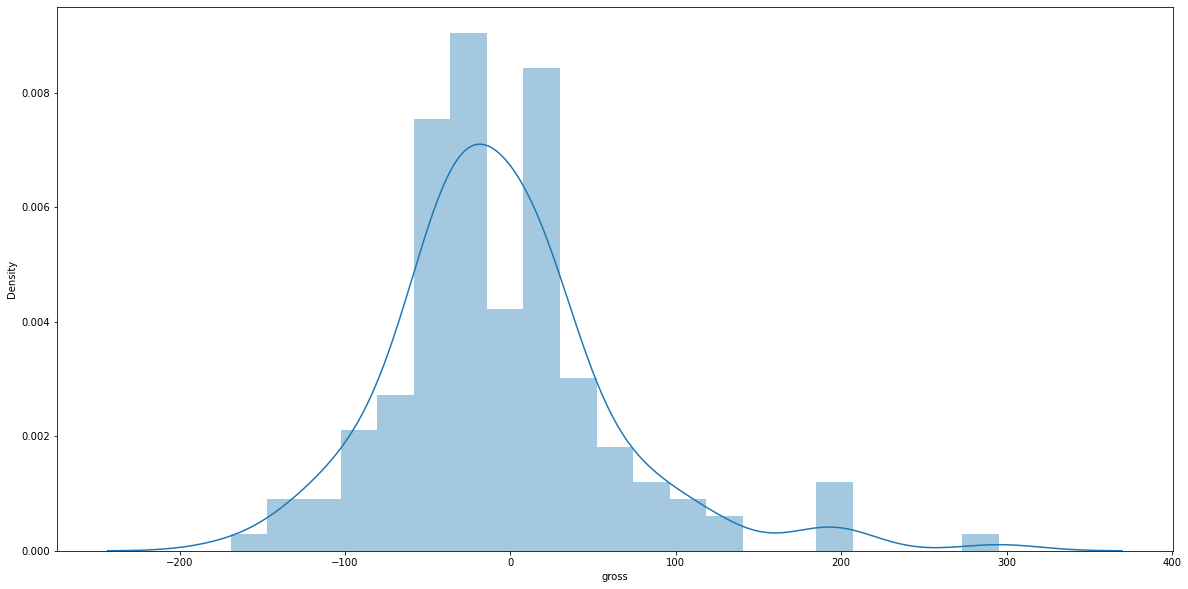

In [ ]:
# By below distplot we can find out that the predicted values are likely to the actual values

plt.figure(figsize=(20,10))
sns.distplot(y_test - y_test_pred)